In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
housing = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\nx_train.csv',index_col=0)

x_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\nx_test.csv',index_col=0)

# y_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\ny_train.csv',index_col=0)

df_dummies = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\df_dummies.csv',index_col=0)
# y_test.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_test.csv',index_col=0)

In [5]:
price_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\ny_train.csv',index_col=0)

price_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\ny_test.csv',index_col=0)

#### convert to string

In [6]:
#change these categorical fields from integer to string

convert_dict = {'MSSubClass':str,
                "MoSold":str
               }

housing = housing.astype(convert_dict)

In [7]:
x_test = x_test.astype(convert_dict)

In [8]:
type(housing.MSSubClass)

pandas.core.series.Series

In [9]:
dummies = list(df_dummies.columns)
type(dummies )

list

In [10]:
pd.set_option('display.max_columns', None)
df_dummies.head(2)

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mixed,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [11]:
pd.set_option('display.max_columns', None)


housing.head(2)

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_price,bc_GrLivArea,has_pool,has_miscfeature,alley_access,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mixed,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1232,1664,162900,60,RL,78.0,10140,Pave,4,Lvl,AllPub,Inside,3,NWAmes,Norm,Norm,1Fam,2Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,PConc,4,3,0,6,194.0,1,0.0,638.0,832.0,GasA,3,Y,SBrkr,832,832,0,0.0,0.0,2,1,4,1,3,8,8,1,3,Attchd,1976.0,RFn,2.0,528.0,3,3,Y,0,28,0,0,259,0,GdWo,0,3,2006,WD,Normal

In [12]:
housing2 = housing.copy()

In [13]:
x_test2 = x_test.copy()

In [14]:
# df.drop(['A'], axis = 1)

#### drop dummies

In [15]:
housing2 = housing2.drop(dummies, axis = 1)

In [16]:
x_test2 = x_test2.drop(dummies, axis = 1)

In [17]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        'Cumulative_Frequency': datax.values.cumsum(),
        'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    #return(datay.set_index(variable_))
    return(datay)

In [18]:
def miss_cols(df):
    missing = np.sum(df.isnull(),axis=0)
    
    miss_ind = np.sum(df.isnull(),axis=0) > 0
    
    vals = pd.Series(filter(lambda x: x != 0,missing))
     
    cols_miss = df.columns[miss_ind]

    L=list(zip(cols_miss,vals, round(vals/df.shape[0],4)))
    
    return sorted(L,reverse=True,key=lambda x: x[2])  

In [19]:
df_obj= housing2.select_dtypes(exclude=['int64','float64','bool'])
categs = list(df_obj.columns)
categs

['MSSubClass',
 'MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [20]:
# nba["College"].fillna("No College", inplace = True)

In [21]:
# def def_miss(feature):
#     housing2[feature].fillna('missing', inplace = True)

In [22]:
# for feature in categs:
#     def_miss(feature)

In [23]:
miss_cols(df_obj)

[]

In [24]:
miss_cols(housing2)

[('LotFrontage', 310, 0.1738),
 ('GarageYrBlt', 94, 0.0527),
 ('MasVnrArea', 9, 0.005),
 ('BsmtFullBath', 1, 0.0006),
 ('BsmtHalfBath', 1, 0.0006),
 ('GarageCars', 1, 0.0006),
 ('GarageArea', 1, 0.0006)]

In [25]:
other_categs = ['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [26]:
#Encode categorical features with integers

lencoder = LabelEncoder()

housing2['MSSubClass'] = lencoder.fit_transform(housing2.MSSubClass).reshape((-1,1))
housing2['MoSold'] = lencoder.fit_transform(housing2.MoSold).reshape((-1,1))

housing2['MSZoning'] = lencoder.fit_transform(housing2.MSZoning).reshape((-1,1))
housing2['Street'] = lencoder.fit_transform(housing2.Street).reshape((-1,1))
housing2['LandContour'] = lencoder.fit_transform(housing2.LandContour).reshape((-1,1))

housing2['Utilities'] =  lencoder.fit_transform(housing2.Utilities).reshape((-1,1))
housing2['LotConfig'] = lencoder.fit_transform(housing2.LotConfig).reshape((-1,1))
housing2['Condition1'] = lencoder.fit_transform(housing2.Condition1).reshape((-1,1))
housing2['Condition2'] = lencoder.fit_transform(housing2.Condition2).reshape((-1,1))
housing2['BldgType'] = lencoder.fit_transform(housing2.BldgType).reshape((-1,1))
housing2['HouseStyle'] = lencoder.fit_transform(housing2.HouseStyle).reshape((-1,1))
housing2['RoofStyle'] = lencoder.fit_transform(housing2.RoofStyle).reshape((-1,1))
housing2['RoofMatl'] = lencoder.fit_transform(housing2.RoofMatl).reshape((-1,1))
housing2['Exterior1st'] = lencoder.fit_transform(housing2.RoofMatl).reshape((-1,1))
housing2['Exterior2nd'] = lencoder.fit_transform(housing2.MasVnrType).reshape((-1,1))
housing2['Foundation'] = lencoder.fit_transform(housing2.Foundation).reshape((-1,1))
housing2['Heating'] = lencoder.fit_transform(housing2.Heating).reshape((-1,1))
housing2['CentralAir'] = lencoder.fit_transform(housing2.CentralAir).reshape((-1,1))
housing2['Electrical'] = lencoder.fit_transform(housing2.Electrical).reshape((-1,1))
housing2['GarageType'] = lencoder.fit_transform(housing2.GarageType).reshape((-1,1))
housing2['GarageFinish'] = lencoder.fit_transform(housing2.GarageFinish).reshape((-1,1))
housing2['PavedDrive'] = lencoder.fit_transform(housing2.PavedDrive).reshape((-1,1))
housing2['Fence'] = lencoder.fit_transform(housing2.Fence).reshape((-1,1))
housing2['SaleType'] = lencoder.fit_transform(housing2.SaleType).reshape(((-1,1)))
housing2['SaleCondition'] = lencoder.fit_transform(housing2.SaleCondition).reshape((-1,1))



In [27]:
# MasVnrType 
housing2['MasVnrType'] = lencoder.fit_transform(housing2.MasVnrType).reshape((-1,1))


In [28]:
x_test2['MSSubClass'] = lencoder.fit_transform(x_test2.MSSubClass).reshape((-1,1))
x_test2['MoSold'] = lencoder.fit_transform(x_test2.MoSold).reshape((-1,1))

x_test2['MSZoning'] = lencoder.fit_transform(x_test2.MSZoning).reshape((-1,1))
x_test2['Street'] = lencoder.fit_transform(x_test2.Street).reshape((-1,1))
x_test2['LandContour'] = lencoder.fit_transform(x_test2.LandContour).reshape((-1,1))

x_test2['Utilities'] =  lencoder.fit_transform(x_test2.Utilities).reshape((-1,1))
x_test2['LotConfig'] = lencoder.fit_transform(x_test2.LotConfig).reshape((-1,1))
x_test2['Condition1'] = lencoder.fit_transform(x_test2.Condition1).reshape((-1,1))
x_test2['Condition2'] = lencoder.fit_transform(x_test2.Condition2).reshape((-1,1))
x_test2['BldgType'] = lencoder.fit_transform(x_test2.BldgType).reshape((-1,1))
x_test2['HouseStyle'] = lencoder.fit_transform(x_test2.HouseStyle).reshape((-1,1))
x_test2['RoofStyle'] = lencoder.fit_transform(x_test2.RoofStyle).reshape((-1,1))
x_test2['RoofMatl'] = lencoder.fit_transform(x_test2.RoofMatl).reshape((-1,1))
x_test2['Exterior1st'] = lencoder.fit_transform(x_test2.RoofMatl).reshape((-1,1))
x_test2['Exterior2nd'] = lencoder.fit_transform(x_test2.MasVnrType).reshape((-1,1))
x_test2['Foundation'] = lencoder.fit_transform(x_test2.Foundation).reshape((-1,1))
x_test2['Heating'] = lencoder.fit_transform(x_test2.Heating).reshape((-1,1))
x_test2['CentralAir'] = lencoder.fit_transform(x_test2.CentralAir).reshape((-1,1))
x_test2['Electrical'] = lencoder.fit_transform(x_test2.Electrical).reshape((-1,1))
x_test2['GarageType'] = lencoder.fit_transform(x_test2.GarageType).reshape((-1,1))
x_test2['GarageFinish'] = lencoder.fit_transform(x_test2.GarageFinish).reshape((-1,1))
x_test2['PavedDrive'] = lencoder.fit_transform(x_test2.PavedDrive).reshape((-1,1))
x_test2['Fence'] = lencoder.fit_transform(x_test2.Fence).reshape((-1,1))
x_test2['SaleType'] = lencoder.fit_transform(x_test2.SaleType).reshape(((-1,1)))
x_test2['SaleCondition'] = lencoder.fit_transform(x_test2.SaleCondition).reshape((-1,1))


In [29]:
# MasVnrType 
x_test2['MasVnrType'] = lencoder.fit_transform(x_test2.MasVnrType).reshape((-1,1))


#### group neighborhoods based on median values of SalePrice as did for linear models  

In [30]:
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans
# {"Uptown": "Manhattan", "Downtown": "Manhattan"}
# has_basement
# has_wood_deck  
# has_EnclosedPorch 



In [31]:
#group neighborhoods based on median values of SalePrice as did for linear models  

neigh_dict = {'NoRidge':'Neighborhood_NoRidge_NridgHt_Veenker_StoneBr', 
             'NridgHt':'Neighborhood_NoRidge_NridgHt_Veenker_StoneBr',
              'Veenker':'Neighborhood_NoRidge_NridgHt_Veenker_StoneBr',
              'StoneBr':'Neighborhood_NoRidge_NridgHt_Veenker_StoneBr',
              
              'Somerst':'Neighborhood_Somerst_Timber',
              'Timber':'Neighborhood_Somerst_Timber',
              
              'ClearCr':'Neighborhood_ClearCr_CollgCr_Crawfor',
              'CollgCr':'Neighborhood_ClearCr_CollgCr_Crawfor',
              'Crawfor':'Neighborhood_ClearCr_CollgCr_Crawfor',
              
              'Greens':'Neighborhood_Greens_SawyerW_Blmngtn',
              'SawyerW':'Neighborhood_Greens_SawyerW_Blmngtn',
              'Blmngtn':'Neighborhood_Greens_SawyerW_Blmngtn',
              
              'Gilbert':'Neighborhood_Gilbert_NWAmes',
              'NWAmes':'Neighborhood_Gilbert_NWAmes',
              
              'Mitchel':'Neighborhood_Mitchel_NPkVill',
              'NPkVill':'Neighborhood_Mitchel_NPkVill',
              
              'NAmes':'Neighborhood_NAmes_SWISU_Sawyer',
              'SWISU':'Neighborhood_NAmes_SWISU_Sawyer',
              'Sawyer':'Neighborhood_NAmes_SWISU_Sawyer',
              
              'BrkSide':'Neighborhood_BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'Edwards':'Neighborhood_BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'Blueste':'Neighborhood_BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'OldTown':'Neighborhood_BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'IDOTRR':'Neighborhood_BrkSide_Edwards_Blueste_OldTown_IDOTRR'
             }

In [32]:
# df['col1'].map(di)
housing2['Neighborhood_mapped'] = housing2['Neighborhood'].map(neigh_dict)

In [33]:
x_test2['Neighborhood_mapped'] = x_test2['Neighborhood'].map(neigh_dict)

In [34]:
proc_freq(housing2,'Neighborhood_mapped')

,Neighborhood_mapped,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,Neighborhood_BrkSide_Edwards_Blueste_OldTown_I...,382,21.98,382,21.98
1,Neighborhood_ClearCr_CollgCr_Crawfor,271,15.59,653,37.57
2,Neighborhood_Gilbert_NWAmes,177,10.18,830,47.76
3,Neighborhood_Greens_SawyerW_Blmngtn,96,5.52,926,53.28
4,Neighborhood_Mitchel_NPkVill,85,4.89,1011,58.17
5,Neighborhood_NAmes_SWISU_Sawyer,417,23.99,1428,82.16
6,Neighborhood_NoRidge_NridgHt_Veenker_StoneBr,180,10.36,1608,92.52
7,Neighborhood_Somerst_Timber,130,7.48,1738,100.00


Encode with integers

In [35]:
#Encode with integers
housing2['Neighborhood_mapped_t'] = lencoder.fit_transform(housing2.Neighborhood_mapped).reshape((-1,1))

In [36]:
x_test2['Neighborhood_mapped_t'] = lencoder.fit_transform(x_test2.Neighborhood_mapped).reshape((-1,1))

In [37]:
#Imputations

list_sub = ['Neighborhood','LotFrontage']
housing2_sub = housing2[list_sub]
housing2_sub

imputation_dict = housing2_sub.groupby(["Neighborhood"]).median().to_dict()
imputation_dict['LotFrontage']

impute_index = housing2_sub.LotFrontage.isnull()

housing2_sub.loc[impute_index,'LotFrontage'] = housing2_sub.loc[impute_index].apply(lambda current_row:imputation_dict['LotFrontage'][(current_row[0])], axis=1)

####  do actual imputation of LotFrontage in housing2

housing2['LotFrontage'] =  housing2_sub['LotFrontage']


######################################################################
# Other imputations

housing2.MasVnrArea = housing2.MasVnrArea.fillna(0)

housing2.BsmtFullBath = housing2.BsmtFullBath.fillna(0)

housing2.BsmtHalfBath = housing2.BsmtHalfBath.fillna(0)

housing2.BsmtFinSF1 = housing2.BsmtFinSF1.fillna(0)

housing2.BsmtFinSF2 = housing2.BsmtFinSF2.fillna(0)

housing2.BsmtUnfSF = housing2.BsmtUnfSF.fillna(0)

housing2.TotalBsmtSF = housing2.TotalBsmtSF.fillna(0)

housing2.GarageCars = housing2.GarageCars.fillna(0)

housing2.GarageArea = housing2.GarageArea.fillna(0)

housing2.loc[housing2['GarageYrBlt'].isnull(),'GarageYrBlt'] = housing2['YearBuilt']

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [38]:
#Imputations

list_sub = ['Neighborhood','LotFrontage']
x_test2_sub =x_test2[list_sub]
x_test2_sub

# imputation_dict =x_test2_sub.groupby(["Neighborhood"]).median().to_dict()
# imputation_dict['LotFrontage']

impute_index =x_test2_sub.LotFrontage.isnull()

x_test2_sub.loc[impute_index,'LotFrontage'] =x_test2_sub.loc[impute_index].apply(lambda current_row:imputation_dict['LotFrontage'][(current_row[0])], axis=1)

####  do actual imputation of LotFrontage inx_test2

x_test2['LotFrontage'] = x_test2_sub['LotFrontage']


######################################################################
# Other imputations

x_test2.MasVnrArea =x_test2.MasVnrArea.fillna(0)

x_test2.BsmtFullBath =x_test2.BsmtFullBath.fillna(0)

x_test2.BsmtHalfBath =x_test2.BsmtHalfBath.fillna(0)

x_test2.BsmtFinSF1 =x_test2.BsmtFinSF1.fillna(0)

x_test2.BsmtFinSF2 =x_test2.BsmtFinSF2.fillna(0)

x_test2.BsmtUnfSF =x_test2.BsmtUnfSF.fillna(0)

x_test2.TotalBsmtSF =x_test2.TotalBsmtSF.fillna(0)

x_test2.GarageCars =x_test2.GarageCars.fillna(0)

x_test2.GarageArea =x_test2.GarageArea.fillna(0)

x_test2.loc[x_test2['GarageYrBlt'].isnull(),'GarageYrBlt'] =x_test2['YearBuilt']

In [39]:
#create features
# housing2['has_wood_deck '] = housing2.WoodDeckSF != 0
# housing2['has_openporch'] = housing2.OpenPorchSF != 0
# housing2['has_EnclosedPorch'] = housing2.EnclosedPorch !=0

housing2['house_age_'] = housing2.YrSold - housing2.YearBuilt #not dummy
housing2['years_since_remodeled_'] = housing2.YrSold - housing2.YearRemodAdd # not dummy

# housing2['has_basement'] = housing2.TotalBsmtSF != 0
# housing2['has_finsished_basement'] = housing2.BsmtFinSF2 !=0


In [40]:
x_test2['house_age_'] = x_test2.YrSold - x_test2.YearBuilt #not dummy
x_test2['years_since_remodeled_'] = x_test2.YrSold - x_test2.YearRemodAdd # not dummy

In [41]:
housing2.shape

(1784, 86)

In [42]:
drops = ['Neighborhood','Neighborhood_mapped','SalePrice','log_price']

In [43]:
housing2 = housing2.drop(drops, axis = 1)

In [44]:
housing2.shape

(1784, 82)

In [45]:
x_test2.shape

(765, 86)

In [46]:
x_test2 = x_test2.drop(drops, axis = 1)

In [47]:
x_test2.shape

(765, 82)

In [48]:
housing2 = housing2.drop(['bc_GrLivArea'],  axis = 1)

In [49]:
x_test2 = x_test2.drop(['bc_GrLivArea'],  axis = 1)

In [50]:
housing2.shape

(1784, 81)

In [51]:
x_test2.shape

(765, 81)

In [52]:
drops2 = ['YrSold','YearRemodAdd','YearBuilt']


In [53]:
housing2 = housing2.drop(drops2, axis = 1)

In [54]:
x_test2 = x_test2.drop(drops2, axis = 1)

In [55]:
housing2.shape

(1784, 78)

In [56]:
x_test2.shape

(765, 78)

# Random Forest

### Create x_train and x_test and apply StandardScaler to them 

In [59]:
x_train = housing2
x_test = x_test2
y_train = np.log(price_train.SalePrice)
y_test = np.log(price_test.SalePrice)

In [60]:
features = list(x_train.columns)

ss = StandardScaler()
x_train = pd.DataFrame(ss.fit_transform(housing2), columns = features)
x_test = pd.DataFrame(ss.fit_transform(x_test2), columns = features)


In [61]:

ensemble.RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Create depth curves

In [62]:
depth = []
train_rmse = []
test_rmse = []
for i in range(1, 31):
    rf = ensemble.RandomForestRegressor(n_estimators=500, max_depth=i)
    rf.fit(x_train,y_train)
    
    depth.append(i)
    
    train_pred = rf.predict(x_train)
    train_rmse.append(mean_squared_error(train_pred,y_train)**0.5)
    
    test_pred = rf.predict(x_test)
    test_rmse.append(mean_squared_error(test_pred,y_test)**0.5)
    

    
    

Text(0.5, 0, 'depth')

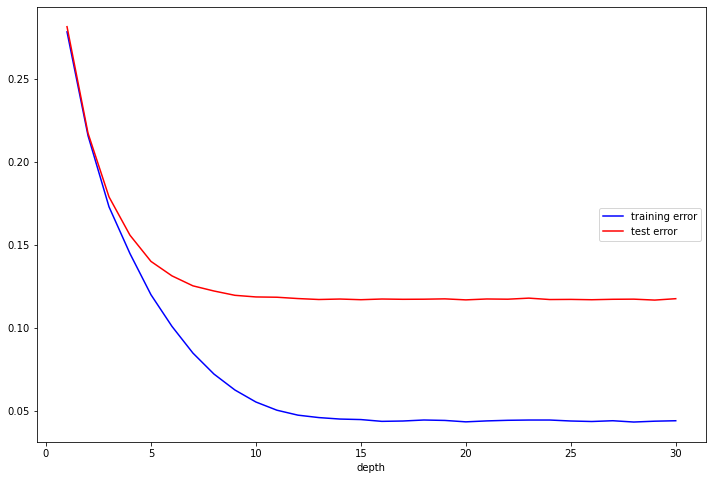

In [63]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(depth, train_rmse, c = 'blue', label='training error')
plt.plot(depth, test_rmse, c = 'red', label='test error')
plt.legend(loc=7)
plt.xlabel('depth')

Text(0, 0.5, 'RMSE')

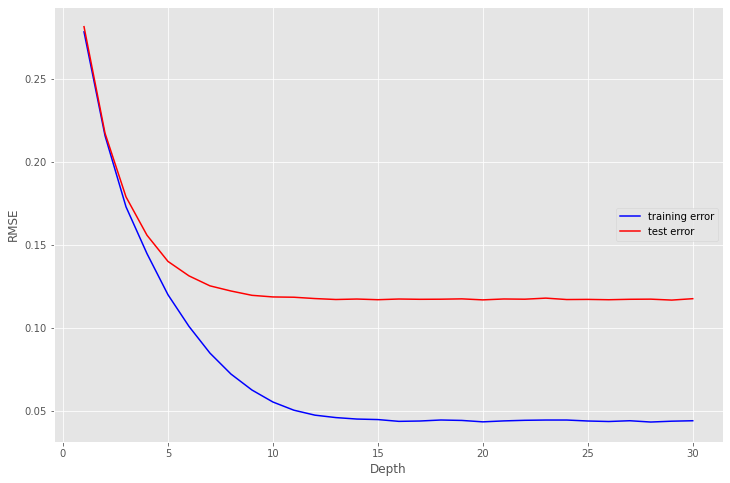

In [73]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(depth, train_rmse, c = 'blue', label='training error')
plt.plot(depth, test_rmse, c = 'red', label='test error')
plt.legend(loc=7)
plt.xlabel('Depth')
plt.ylabel('RMSE')

In [ ]:
# "min_samples_leaf": range(2, 11), "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
from rs_regx_func_dict import regx_rs

In [ ]:
rf0=  regx_rs(model= ensemble.RandomForestRegressor(), 
x_train = housing2,
x_test = x_test2,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params= {'max_depth':[5,7,9,11,13],'n_estimators':[500], "min_samples_split":range(2,31),
         "min_samples_leaf":range(2,31),'random_state':[0]},
cv_ = 3,
linear_reg = False,
tree_based = True)

### Best Model rf1

In [67]:
rf1=  regx_rs(model= ensemble.RandomForestRegressor(), 
x_train = housing2,
x_test = x_test2,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params= {'max_depth':[6,7,8,9,10],'n_estimators':[500], "min_samples_split":range(2,31),
                  "min_samples_leaf":range(2,31),'random_state':[0]},
cv_ = 3,
linear_reg = False,
tree_based = True)

best params:  {'random_state': 0, 'n_estimators': 500, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 9}
score:  0.9636878151849657
  
test score:  0.8956756886234538
 
train RMSE: 0.07192878539334124
  
test RMSE: 0.1203782699164363
                  features  importances
0              OverallQual     0.523389
1                GrLivArea     0.116081
2               GarageArea     0.080380
3              TotalBsmtSF     0.051671
4                 1stFlrSF     0.045365
5               GarageCars     0.034687
6               BsmtFinSF1     0.013204
7               house_age_     0.012626
8              OverallCond     0.010573
9                  LotArea     0.010395
10  years_since_remodeled_     0.009380
11                MSZoning     0.007576
12   Neighborhood_mapped_t     0.007384
13              CentralAir     0.006230
14              GarageType     0.004733
15            BsmtFinType1     0.004679
16                2ndFlrSF     0.004380
17             FireplaceQu     0.

In [74]:
import math

features = list(housing2.columns)
ss = StandardScaler()

x_train = pd.DataFrame(ss.fit_transform(housing2), columns = features)
x_test = pd.DataFrame(ss.fit_transform(x_test2), columns = features)

predict_train = rf1['mod'].predict(x_train).reshape((-1,1))
predict_test = rf1['mod'].predict(x_test).reshape((-1,1))


predicted_price_test = pd.Series(list(map(math.exp,predict_test)), name = 'predicted_price_test')
predicted_price_train = pd.Series(list(map(math.exp,predict_train)), name = 'predicted_price_train')


In [75]:
price_compare_test = pd.concat([predicted_price_test,price_test.reset_index()], axis=1)

price_compare_test['price_difference'] =   price_compare_test['SalePrice'] - price_compare_test['predicted_price_test']


average difference test data

In [76]:
price_compare_test.price_difference.abs().mean()

15029.049523533015

In [77]:
price_compare_train = pd.concat([predicted_price_train,price_train.reset_index()], axis=1)

price_compare_train['price_difference'] =   price_compare_train['SalePrice'] - price_compare_train['predicted_price_train']


average difference train data

In [78]:
price_compare_train.price_difference.abs().mean()

8938.98498960402

In [79]:
rf2=  regx_rs(model= ensemble.RandomForestRegressor(), 
x_train = housing2,
x_test = x_test2,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params= {'max_depth':[6,7,8,9,10],'n_estimators':[500], "min_samples_split":range(2,31),
                  "min_samples_leaf":range(6,31),'random_state':[0]},
cv_ = 3,
linear_reg = False,
tree_based = True)

best params:  {'random_state': 0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 8}
score:  0.9431622958520371
  
test score:  0.8905668486728292
 
train RMSE: 0.08999011364033002
  
test RMSE: 0.12329054910605514
                  features  importances
0              OverallQual     0.539762
1                GrLivArea     0.116902
2               GarageArea     0.082044
3              TotalBsmtSF     0.052425
4                 1stFlrSF     0.045399
5               GarageCars     0.035617
6               BsmtFinSF1     0.012461
7               house_age_     0.011999
8   years_since_remodeled_     0.009019
9                  LotArea     0.008494
10             OverallCond     0.008449
11                MSZoning     0.007632
12   Neighborhood_mapped_t     0.007560
13              CentralAir     0.006078
14            BsmtFinType1     0.004691
15              GarageType     0.004621
16             FireplaceQu     0.003976
17                2ndFlrSF     0

In [80]:
rf3=  regx_rs(model= ensemble.RandomForestRegressor(), 
x_train = housing2,
x_test = x_test2,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params= {'max_depth':[6,7,8],'n_estimators':[500], "min_samples_split":range(2,31),
                  "min_samples_leaf":range(6,31),'random_state':[0]},
cv_ = 3,
linear_reg = False,
tree_based = True)

best params:  {'random_state': 0, 'n_estimators': 500, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_depth': 8}
score:  0.9340588157050174
  
test score:  0.8861943174835596
 
train RMSE: 0.0969292624356778
  
test RMSE: 0.12572953455464386
                  features  importances
0              OverallQual     0.546531
1                GrLivArea     0.117656
2               GarageArea     0.082771
3              TotalBsmtSF     0.052203
4                 1stFlrSF     0.045697
5               GarageCars     0.036151
6               BsmtFinSF1     0.012079
7               house_age_     0.011453
8   years_since_remodeled_     0.008612
9                  LotArea     0.007831
10                MSZoning     0.007433
11             OverallCond     0.007396
12   Neighborhood_mapped_t     0.007306
13              CentralAir     0.005876
14              GarageType     0.004641
15            BsmtFinType1     0.004626
16             FireplaceQu     0.004130
17                2ndFlrSF     0

In [81]:
rf4=  regx_rs(model= ensemble.RandomForestRegressor(), 
x_train = housing2,
x_test = x_test2,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params= {'max_depth':[6,7,8],'n_estimators':[1000], "min_samples_split":range(2,31),
                  "min_samples_leaf":range(6,31),'random_state':[0]},
cv_ = 3,
linear_reg = False,
tree_based = True)

best params:  {'random_state': 0, 'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 6}
score:  0.9198820471129379
  
test score:  0.8775620160055759
 
train RMSE: 0.10684186459786663
  
test RMSE: 0.1304107579435314
                  features  importances
0              OverallQual     0.561176
1                GrLivArea     0.119312
2               GarageArea     0.081369
3              TotalBsmtSF     0.050497
4                 1stFlrSF     0.046687
5               GarageCars     0.036033
6               house_age_     0.011369
7               BsmtFinSF1     0.010237
8                 MSZoning     0.007384
9              OverallCond     0.007233
10  years_since_remodeled_     0.006940
11                 LotArea     0.006241
12              CentralAir     0.006035
13   Neighborhood_mapped_t     0.005966
14              GarageType     0.004679
15             FireplaceQu     0.003787
16            BsmtFinType1     0.003722
17             KitchenQual     0